<a href="https://colab.research.google.com/github/ncontinanza/30-days-of-code/blob/master/Voting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import base64

token = base64.b64decode("Njk4ZGVjMWE5Y2YyNDQ5ZmNhY2FkOWU4NDdjMDk5NWU1NTZhMDk5Yw====").decode("utf-8")

! rm -rf tp-datos-2c2020 datos
! git clone https://{token}@github.com/AlexDaciuk/tp-datos-2c2020.git
! mv tp-datos-2c2020 datos

from datos.preproc import preprocessing
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
import pandas as pd
import numpy as np


Cloning into 'tp-datos-2c2020'...
remote: Enumerating objects: 181, done.
remote: Counting objects: 100% (181/181), done.
remote: Compressing objects: 100% (143/143), done.
remote: Total 416 (delta 80), reused 107 (delta 38), pack-reused 235
Receiving objects: 100% (416/416), 9.94 MiB | 27.30 MiB/s, done.
Resolving deltas: 100% (208/208), done.


In [9]:
df_all = preprocessing.get_data()

In [10]:
df_voting = preprocessing.knn_preproc(df_all)

In [11]:
# Separate test and train data
X_train, X_test, y_train, y_test = train_test_split(df_voting.drop('volveria', 1), df_voting['volveria'])

{'clf_4__max_features': 'auto', 'clf_4__max_depth': 5, 'clf_4__loss': 'exponential', 'clf_3__max_features': 'log2', 'clf_3__max_depth': 3, 'clf_3__criterion': 'gini', 'clf_2__splitter': 'best', 'clf_2__max_features': 'auto', 'clf_2__max_depth': 4, 'clf_2__criterion': 'entropy', 'clf_1__weights': 'uniform', 'clf_1__p': 2, 'clf_1__n_neighbors': 8, 'clf_1__algorithm': 'auto'}
El score general del modelo es 0.8856995884773662
La media del cross validation score con k=10 es 0.882612069110925
El accuracy del modelo es 0.8208955223880597
La precision del modelo es 0.8461538461538461
El recall del modelo es 0.6790123456790124
El f1 del modelo es 0.7534246575342466


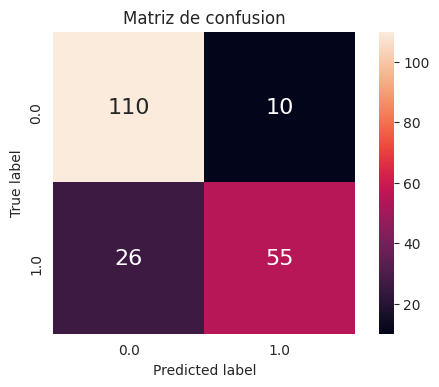

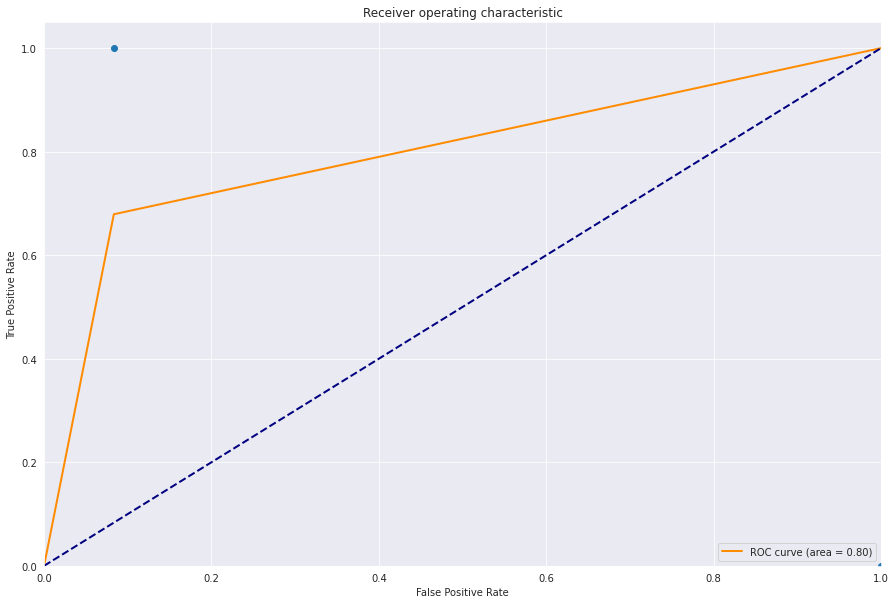

In [12]:
# Inicializo el clasificador
clf_1 = KNeighborsClassifier()
clf_2 = DecisionTreeClassifier()
clf_3 = RandomForestClassifier()
clf_4 = GradientBoostingClassifier()

eclf = VotingClassifier(estimators=[('clf_1', clf_1), ('clf_2', clf_2), ('clf_3', clf_3), ('clf_4', clf_4)], voting='soft', n_jobs=-1)
params = {'clf_1__n_neighbors': range(1,15),
          'clf_1__p': range(1,3),
          'clf_1__weights': ('uniform', 'distance'),
          'clf_1__algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
          'clf_2__max_depth': range(3,10), 
          'clf_2__criterion': ('gini', 'entropy'), 
          'clf_2__splitter': ('best', 'random'), 
          'clf_2__max_features' : ('auto', 'sqrt', 'log2'),
          'clf_3__criterion': ('gini', 'entropy'), 
          'clf_3__max_depth' : range(1,10), 
          'clf_3__max_features' : ('auto', 'sqrt', 'log2'),
          'clf_4__max_depth': range(1,8), 
          'clf_4__loss': ('deviance', 'exponential'), 
          'clf_4__max_features': ('auto', 'sqrt', 'log2')
          }

gscv = RandomizedSearchCV(eclf, params, n_iter=70,  scoring='roc_auc', n_jobs=-1, cv=5, return_train_score=True)          
gscv.fit(X_train, y_train)
print(gscv.best_params_)

preprocessing.report(gscv, X_train, y_train, X_test, y_test)